## Sms ham or spam

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_file=r'/Users/lalitsachan/Dropbox/March onwards/Python Data Science/Data/SMSSpamCollection.txt'

In [4]:
f=open(data_file,"r")

target=[]
sms=[]

for line in f:
    line=line.strip()
    if line=="":continue
        
    if line[0:4]=="spam":
        sms.append(line.split('spam')[1].strip())
        target.append("spam")
    
    if line[0:3]=="ham":
        sms.append(line.split('ham')[1].strip())
        target.append("ham")

f.close()

mydata=pd.DataFrame(list(zip(target,sms)),columns=['target','sms'])

In [5]:
mydata.head()

,target,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
mydata['target'].value_counts()

ham     4827
spam     747
Name: target, dtype: int64

In [7]:
all_sms=" ".join(mydata['sms'])
ham_sms=" ".join(mydata.loc[mydata['target']=="ham","sms"])
spam_sms=" ".join(mydata.loc[mydata['target']=="spam","sms"])
# spam_sms

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=4000,height=2000).generate(all_sms)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=4000,height=2000).generate(ham_sms)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', 
                      width=4000,height=2000).generate(spam_sms)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Naive bayes with simple features

Gaussian: It is used in classification and it assumes that features follow a normal distribution.

Multinomial: used with features which are counts.

Bernoulli: when features are binary

In [9]:
mydata['length']=[len(x) for x in mydata['sms']]

In [10]:
mydata.head()

,target,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [11]:
from ggplot import *

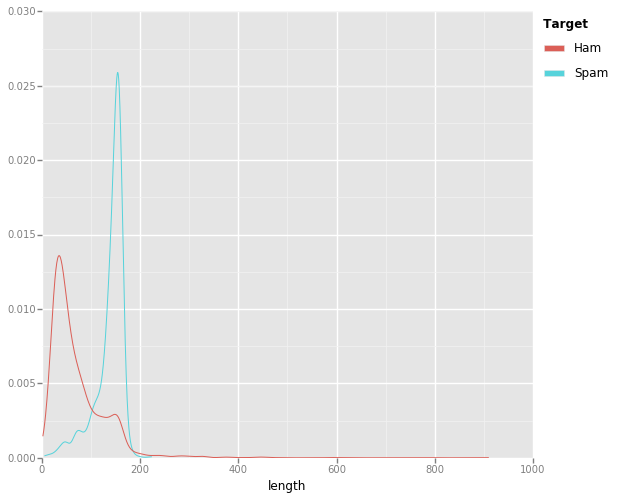

<ggplot: (299217977)>

In [12]:
ggplot(mydata,aes(x='length',color='target'))+geom_density()

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split

In [14]:
mydata_train,mydata_test =train_test_split(mydata,test_size=0.2,random_state=2)

x_train=mydata_train.drop(['sms','target'],1)
y_train=mydata_train['target']


x_test=mydata_test.drop(['sms','target'],1)
y_test=mydata_test['target']

clf=MultinomialNB()

clf.fit(x_train,y_train)

predictions=pd.DataFrame(list(zip(y_test,clf.predict(x_test))),columns=['real','predicted'])

pd.crosstab(predictions['real'],predictions['predicted'])

predicted,ham
real,
ham,951
spam,164


In [15]:
mydata['word_will']=[int(np.where("will" in x,1,0)) for x in mydata['sms']]
mydata['word_call']=[int(np.where("call" in x,1,0)) for x in mydata['sms']]
mydata['word_FREE']=[int(np.where("FREE" in x,1,0)) for x in mydata['sms']]
mydata['long']=[int(np.where(len(x)>250,1,0)) for x in mydata['sms']]

In [16]:
mydata_train,mydata_test =train_test_split(mydata,test_size=0.2,random_state=2)

x_train=mydata_train.drop(['sms','target'],1)
y_train=mydata_train['target']


x_test=mydata_test.drop(['sms','target'],1)
y_test=mydata_test['target']

clf=MultinomialNB()

clf.fit(x_train,y_train)

predictions=pd.DataFrame(list(zip(y_test,clf.predict(x_test))),columns=['real','predicted'])

pd.crosstab(predictions['real'],predictions['predicted'])

predicted,ham,spam
real,,
ham,951,0
spam,147,17


 these doesnt do very well. lets compare this performance with a simple all default decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf=DecisionTreeClassifier()

In [20]:
clf.fit(x_train,y_train)

predictions=pd.DataFrame(list(zip(y_test,clf.predict(x_test))),columns=['real','predicted'])

pd.crosstab(predictions['real'],predictions['predicted'])

predicted,ham,spam
real,,
ham,933,18
spam,104,60


 now lets utilise all the words and how they appear in the entire document. And see if Naive Bayes can beat this

In [130]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 'd',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 'more',
 'most',
 'mustn',
 'my',
 'myself',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 'she',
 'should',
 'shouldn',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'the',
 'their',
 'theirs',
 'them',
 

In [170]:
def split_into_lemmas(message):
    message=message.lower()
    words = TextBlob(message).words
    words_sans_stop=[]
    for word in words :
        if word in stop:continue
        words_sans_stop.append(word)
    return [word.lemma for word in words_sans_stop]

In [171]:
tfidf= TfidfVectorizer(analyzer=split_into_lemmas)


In [172]:
tfidf.fit(mydata_train['sms'])

TfidfVectorizer(analyzer=<function split_into_lemmas at 0x1238cfa60>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), norm='l2',
        preprocessor=None, smooth_idf=True, stop_words=None,
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [173]:
train_tfidf=tfidf.transform(mydata_train['sms'])

In [174]:
clf= MultinomialNB()
clf.fit(train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [175]:
test_tfidf=tfidf.transform(mydata_test['sms'])

In [176]:

predictions=pd.DataFrame(list(zip(y_test,clf.predict(test_tfidf))),columns=['real','predicted'])

pd.crosstab(predictions['real'],predictions['predicted'])

predicted,ham,spam
real,,
ham,951,0
spam,42,122


This not only vastly ourperforms the tree but has a very good property of not capturing good messages as spam at all

In [179]:
## feature importance

def print_top10(vectorizer, clf):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    indices=np.argsort(clf.coef_)[0][-10:]
    for i in range(10):
        print(feature_names[indices[i]])

In [180]:
print_top10(tfidf,clf)

prize
ur
stop
2
text
claim
mobile
txt
free
call


These are the keywords which make a message more prone to it being labelled as spam. You can make this better by including variables other than derived from simple word count

We'll conclude our discussion here. Please do the practice exercises . If you face any issue we'll discuss that either in class or QA forum on LMS.

Prepared By : Lalit Sachan (lalit.sachan@edvancer.in)

In case of any doubts or errata alert; please take to QA forum for discussion.

Doubts will be discussed in live class sessions too. [This doesnt apply for self paced students]